# Step 1: Import libraries

In [91]:
# Import necessary libraries
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import geopandas as gpd
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os

# Step 2: Read the multiband tiff image

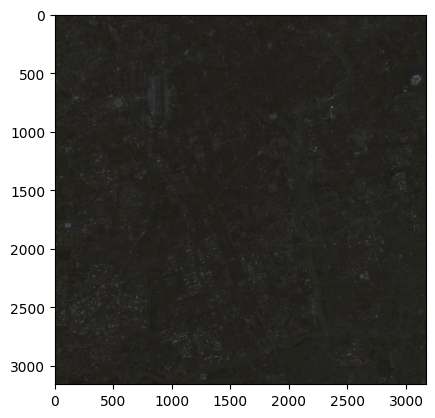

In [132]:
image_path = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_elab\histogram_matched_imgs\2024_matched.tif"
image = rasterio.open(image_path)

# Visualize True Color image
# Read the band values into numpy arrays
red = image.read(3)
green = image.read(2)
blue = image.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

rgb = np.dstack((redn, greenn, bluen))

plt.imshow(rgb)

# Step 3: Read the vector training areas from GeoPackage

In [133]:
training_data_path = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\gpkg\Training_dataset.gpkg"
training_data = gpd.read_file(training_data_path)
training_data.head

<bound method NDFrame.head of              Type        ha  Class  \
0     non_builtup  0.000007      1   
1     non_builtup  0.525347      1   
2     non_builtup  0.435454      1   
3     non_builtup  1.832142      1   
4     non_builtup  0.525347      1   
...           ...       ...    ...   
1236        water  1.927825      3   
1237        water  5.602389      3   
1238        water  0.263251      3   
1239        water  0.311418      3   
1240        water  0.000134      3   

                                               geometry  
0     MULTIPOLYGON (((358660.005 3434617.858, 358660...  
1     MULTIPOLYGON (((357238.538 3433887.72, 357214....  
2     MULTIPOLYGON (((357576.026 3433868.188, 357497...  
3     MULTIPOLYGON (((357228.941 3433554.062, 357298...  
4     MULTIPOLYGON (((357433.187 3433453.902, 357408...  
...                                                 ...  
1236  MULTIPOLYGON (((354854.978 3434343.577, 354873...  
1237  MULTIPOLYGON (((355033.914 3434026.528, 354

# Step 4: Extract pixel values from the image (X) corresponding to training data (y)

In [134]:
X = []  # Feature vector
y = []  # Class labels

for index, row in training_data.iterrows():
    # Extract pixel values within the boundaries of each training area
    geom = row['geometry']
    out_image, out_transform = mask(image, [geom], crop=True)
    out_image = np.moveaxis(out_image, 0, -1)  # Move axis to match sklearn format
    flat_pixels = out_image.reshape(-1, out_image.shape[-1])
    for pixel in flat_pixels:
        X.append(pixel)
        y.append(row['Class'])
        
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# Step 5: Split data into training and testing sets

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # test_size = training/test ratio

# Step 6: Train a Random Forest classifier

In [82]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#classifier = GradientBoostingClassifier(random_state=42) #use a different classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 7: Evaluate the classifier

In [136]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5999155230056629


In [137]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

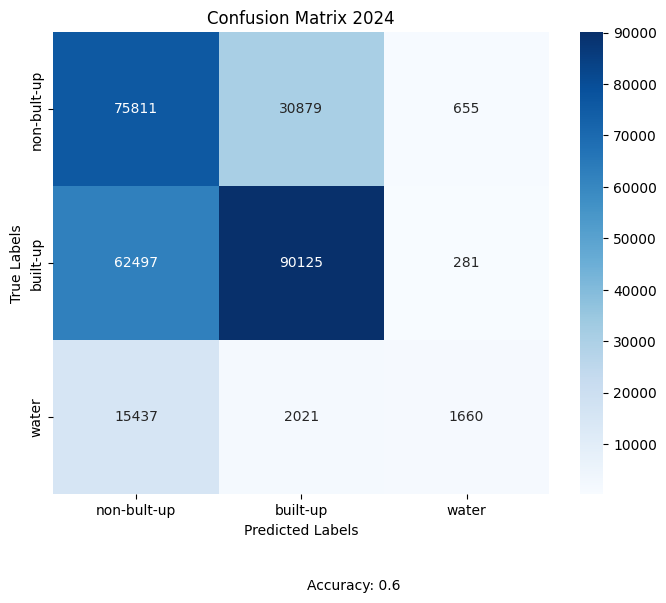

In [138]:
# Plot confusion matrix with labels
custom_labels = ['non-bult-up', 'built-up', 'water'] 
subtitle_text = f"Accuracy: {round(accuracy, 3)}"

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=custom_labels,
            yticklabels=custom_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix 2024')

# Add subtitle
plt.figtext(0.5, -0.05, subtitle_text, ha='center', fontsize=10)


plt.show()

# Save the plot
output_path = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_elab\confusion_matrixes\conf_matrix_2024"
fig.savefig(output_path, bbox_inches='tight')

# Step 8: Classify the image

In [139]:
# Reshape image data to match the structure of training data
image_data = image.read().transpose(1, 2, 0)  # Move bands to the last axis
rows, cols, bands = image_data.shape
image_data_reshaped = image_data.reshape(rows * cols, bands)

In [140]:
# Classify the image
predicted_classes = classifier.predict(image_data_reshaped)
predicted_classes_reshaped = predicted_classes.reshape(rows, cols)

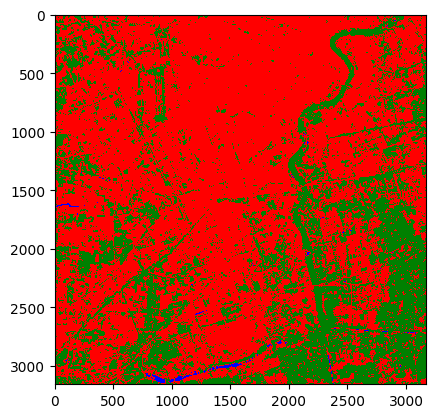

<Axes: >

In [141]:
# Visualize the classified image

colors = ['green', 'red', 'blue']
class_bins = [1, 2, 3] # {1:'built-up', 2:'non built-up', 3:'water'}
cmap = ListedColormap(colors)


show(predicted_classes_reshaped, cmap=cmap)

# Step 9: Save the classified image as a new GeoTIFF file

In [142]:
output_image_path = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_elab\rf_classificator_outputs\Rf_classified_2024.tif"
with rasterio.open(output_image_path, 'w', **image.meta) as dst:
    dst.write(predicted_classes_reshaped.astype(rasterio.uint8), 1)

# Step 10: Perform same operations above for the other time thresholds usign the same model & training dataset

In [74]:
# Apply classifier to other years

# Open the other year image
image_path_2018 = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_elab\histogram_matched_imgs\2020_matched.tif"
image_2018 = rasterio.open(image_path_2018)

In [75]:
# Reshape image data to match the structure of training data
image_data_2018 = image_2018.read().transpose(1, 2, 0)  # Move bands to the last axis
rows_2018, cols_2018, bands_2018 = image_data_2018.shape
image_data_reshaped_2018 = image_data_2018.reshape(rows_2018 * cols_2018, bands_2018)

In [76]:
# Classify the image
predicted_classes_2018 = classifier.predict(image_data_reshaped_2018)
predicted_classes_reshaped_2018 = predicted_classes_2018.reshape(rows_2018, cols_2018)

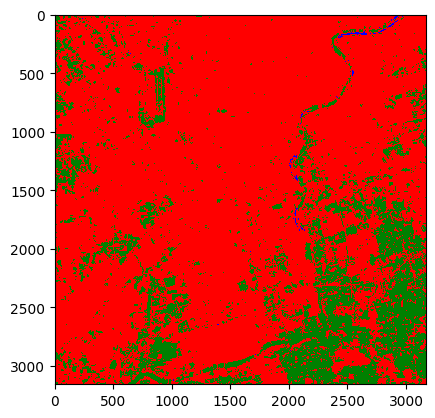

<Axes: >

In [72]:
# Visualize the classified image

colors = ['green', 'red', 'blue']
class_bins = [1, 2, 3] # {1:'built-up', 2:'non built-up', 3:'water'}
cmap = ListedColormap(colors)


show(predicted_classes_reshaped_2018, cmap=cmap)

In [73]:
# Save the classified image
output_image_path = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_elab\rf_classificator_outputs\Rf_classified_2018.tif"
with rasterio.open(output_image_path, 'w', **image.meta) as dst:
    dst.write(predicted_classes_reshaped_2018.astype(rasterio.uint8), 1)